In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# **Main Test & Split**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Patient Scoring Data/data-ori.csv')
X=df.drop(columns=['SOURCE'])
Y=df['SOURCE']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4,stratify=Y,random_state=50)

In [ ]:
df.shape

(4412, 11)

In [ ]:
X.nunique()

HAEMATOCRIT     326
HAEMOGLOBINS    128
ERYTHROCYTE     433
LEUCOCYTE       276
THROMBOCYTE     554
MCH             189
MCHC            105
MCV             406
AGE              95
SEX               2
dtype: int64

In [ ]:
Y.nunique()

2

# **Catboost**

In [ ]:
!pip install catboost

In [ ]:
!pip install ipywidgets

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
X.dtypes

HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX               int64
dtype: object

In [ ]:
X_Cat=X.astype({"HAEMATOCRIT":int, "HAEMOGLOBINS":int, "ERYTHROCYTE":int, "LEUCOCYTE":int, "MCH":int, "MCHC":int, "MCV":int})

In [ ]:
X_Cat.dtypes

HAEMATOCRIT     int64
HAEMOGLOBINS    int64
ERYTHROCYTE     int64
LEUCOCYTE       int64
THROMBOCYTE     int64
MCH             int64
MCHC            int64
MCV             int64
AGE             int64
SEX             int64
dtype: object

In [ ]:
categorical_features_indices = np.where(X_Cat.dtypes != np.float)[0]
print(categorical_features_indices)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
Y.dtypes

dtype('int64')

In [ ]:
X_Cat_train, X_Cat_test, y_Cat_train, y_Cat_test = train_test_split(X_Cat, Y, test_size=0.4,stratify=Y,random_state=50)

In [ ]:
import catboost as ctb
model_CBC = ctb.CatBoostClassifier(iterations=98, learning_rate=0.1)
model_CBC.fit(X_Cat_train, y_Cat_train, cat_features=categorical_features_indices,eval_set=(X_Cat_test, y_Cat_test))
print(model_CBC)

0:	learn: 0.6813928	test: 0.6814407	best: 0.6814407 (0)	total: 17.7ms	remaining: 1.72s
1:	learn: 0.6706393	test: 0.6715048	best: 0.6715048 (1)	total: 29.2ms	remaining: 1.4s
2:	learn: 0.6613603	test: 0.6627647	best: 0.6627647 (2)	total: 37.6ms	remaining: 1.19s
3:	learn: 0.6535861	test: 0.6554891	best: 0.6554891 (3)	total: 42.9ms	remaining: 1.01s
4:	learn: 0.6472019	test: 0.6495830	best: 0.6495830 (4)	total: 51.1ms	remaining: 950ms
5:	learn: 0.6417546	test: 0.6445471	best: 0.6445471 (5)	total: 60.1ms	remaining: 922ms
6:	learn: 0.6379778	test: 0.6409232	best: 0.6409232 (6)	total: 67.1ms	remaining: 872ms
7:	learn: 0.6345700	test: 0.6373889	best: 0.6373889 (7)	total: 73.7ms	remaining: 829ms
8:	learn: 0.6300900	test: 0.6335102	best: 0.6335102 (8)	total: 80.8ms	remaining: 799ms
9:	learn: 0.6261655	test: 0.6305227	best: 0.6305227 (9)	total: 84.1ms	remaining: 740ms
10:	learn: 0.6230981	test: 0.6278996	best: 0.6278996 (10)	total: 87.6ms	remaining: 693ms
11:	learn: 0.6206235	test: 0.6259280	best:

In [ ]:
expected_y  = y_Cat_test
predicted_y = model_CBC.predict(X_Cat_test)

In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(expected_y, predicted_y))
print("Precision:",metrics.precision_score(expected_y, predicted_y))
print("Recall:",metrics.recall_score(expected_y, predicted_y))
print("F1:",metrics.f1_score(expected_y, predicted_y))

Accuracy: 0.7042492917847025
Precision: 0.6811320754716981
Recall: 0.5056022408963585
F1: 0.5803858520900321


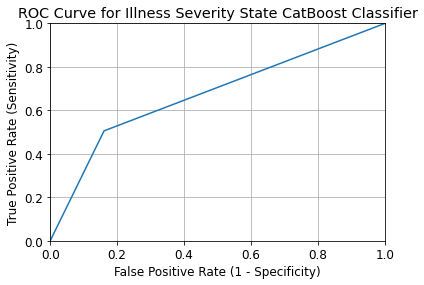

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(expected_y, predicted_y)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Illness Severity State CatBoost Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

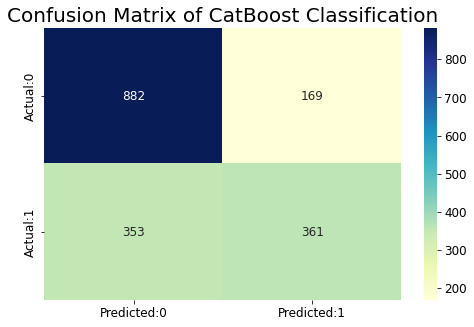

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(expected_y,predicted_y)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix of CatBoost Classification", fontsize =20)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# **Dimenstion Reduction**

In [ ]:
#X1=X.drop(['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','MCH','MCHC'],axis=1)

In [ ]:
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=0.2,random_state=20)

In [ ]:
#model_CBC1 = ctb.CatBoostClassifier()
#model_CBC1.fit(X1_train, y1_train)
#print(model_CBC1)

In [ ]:
#expected_y1  = y1_test
#predicted_y1 = model_CBC1.predict(X1_test)

In [ ]:
#print("Accuracy:",metrics.accuracy_score(expected_y1, predicted_y1))
#print("Precision:",metrics.precision_score(expected_y1, predicted_y1))
#print("Recall:",metrics.recall_score(expected_y1, predicted_y1))
#print("F1:",metrics.f1_score(expected_y1, predicted_y1))

# **Logistic Regression**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [ ]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head(100)

,const,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,1.0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,1,0
1,1.0,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,1,0
2,1.0,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,1,0
3,1.0,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,1,0
4,1.0,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,35.9,12.2,4.46,3.2,218,27.4,34.0,80.5,3,1,0
96,1.0,41.5,13.6,4.89,8.0,253,27.8,32.8,84.9,3,1,0
97,1.0,33.4,11.2,4.42,7.2,319,25.3,33.5,75.6,3,1,0
98,1.0,34.3,11.4,4.48,13.9,225,25.4,33.2,76.6,3,1,0


In [ ]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=df_constant.columns[:-1]
model=sm.Logit(df.SOURCE,df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.579756
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 SOURCE   No. Observations:                 4412
Model:                          Logit   Df Residuals:                     4401
Method:                           MLE   Df Model:                           10
Date:                Wed, 23 Feb 2022   Pseudo R-squ.:                  0.1408
Time:                        22:11:22   Log-Likelihood:                -2557.9
converged:                       True   LL-Null:                       -2976.9
Covariance Type:            nonrobust   LLR p-value:                1.316e-173
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.9271      8.480     -0.935      0.350     -24.549       8.694
HAEMATOCRIT     -0.0156      0.062     -0.252      0.801      -0.137       0.105
HAEMOGLOBINS     0.0326      0.202      0.161      0.872      -0.364       0.429
ERYTHROCYTE     -0.8242      0.386     -2.137      0.033      -1.580      -0.068
LEUCOCYTE        0.0818      0.008      9.700      0.000       0.065       0.098
THROMBOCYTE     -0.0068      0.000    -18.185      0.000      -0.008      -0.006
MCH             -0.7626      0.292     -2.609      0.009      -1.336      -0.190
MCHC             0.5468      0.245      2.235      0.025       0.067       1.026
MCV              0.1862      0.098      1.896      0.058      -0.006       0.379
AGE              0.0049      0.002      2.663      0.008       0.001       0.008
SEX             -0.4602      0.074     -6.233      0.000      -0.605      -0.315
================================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test

316     0
3990    0
654     0
3696    1
2656    0
       ..
189     0
2495    0
653     0
2206    1
4314    0
Name: SOURCE, Length: 1765, dtype: int64

In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7263456090651558
Precision: 0.7166979362101313
Recall: 0.5350140056022409
F1: 0.6126704089815557


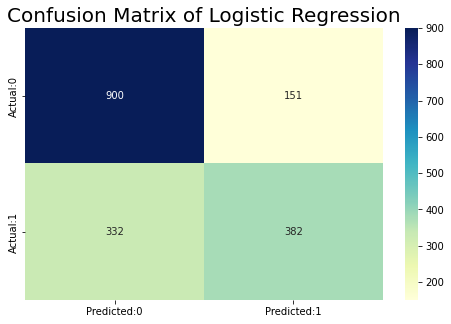

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix of Logistic Regression", fontsize =20)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [ ]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.7263456090651558 
 The Missclassification = 1-Accuracy =  0.2736543909348442 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.5350140056022409 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8563273073263559 
 Positive Predictive value = TP/(TP+FP) =  0.7166979362101313 
 Negative predictive Value = TN/(TN+FN) =  0.7305194805194806 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  3.723839204555995 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.5430003112356053


In [ ]:
y_pred_prob=logreg.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of patient out (0)','Prob of patient in (1)'])
y_pred_prob_df.head(100)

,Prob of patient out (0),Prob of patient in (1)
0,0.801342,0.198658
1,0.625734,0.374266
2,0.693622,0.306378
3,0.723498,0.276502
4,0.486903,0.513097
...,...,...
95,0.484314,0.515686
96,0.800965,0.199035
97,0.674367,0.325633
98,0.771990,0.228010


In [ ]:
y_pred_prob

array([[0.80134205, 0.19865795],
       [0.62573428, 0.37426572],
       [0.69362197, 0.30637803],
       ...,
       [0.63658346, 0.36341654],
       [0.33668369, 0.66331631],
       [0.50957099, 0.49042901]])

In [ ]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[   0 1051]
 [   0  714]] 
 with 714 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.2 threshold the Confusion Matrix is  
 [[   0 1051]
 [   0  714]] 
 with 714 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.3 threshold the Confusion Matrix is  
 [[   0 1051]
 [   0  714]] 
 with 714 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.4 threshold the Confusion Matrix is  
 [[   0 1051]
 [   0  714]] 
 with 714 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 





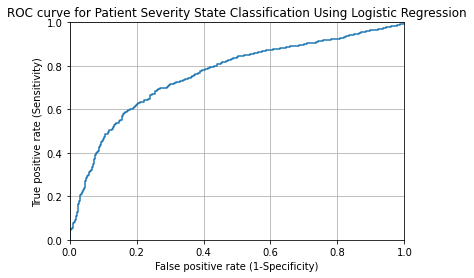

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Patient Severity State Classification Using Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

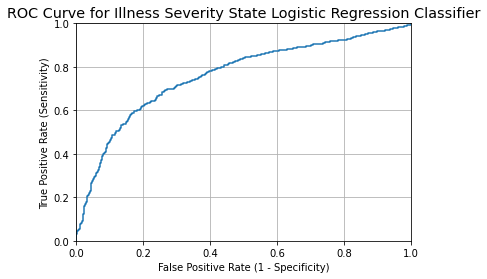

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_yes[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Illness Severity State Logistic Regression Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
import sklearn.metrics
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.7607920427923786

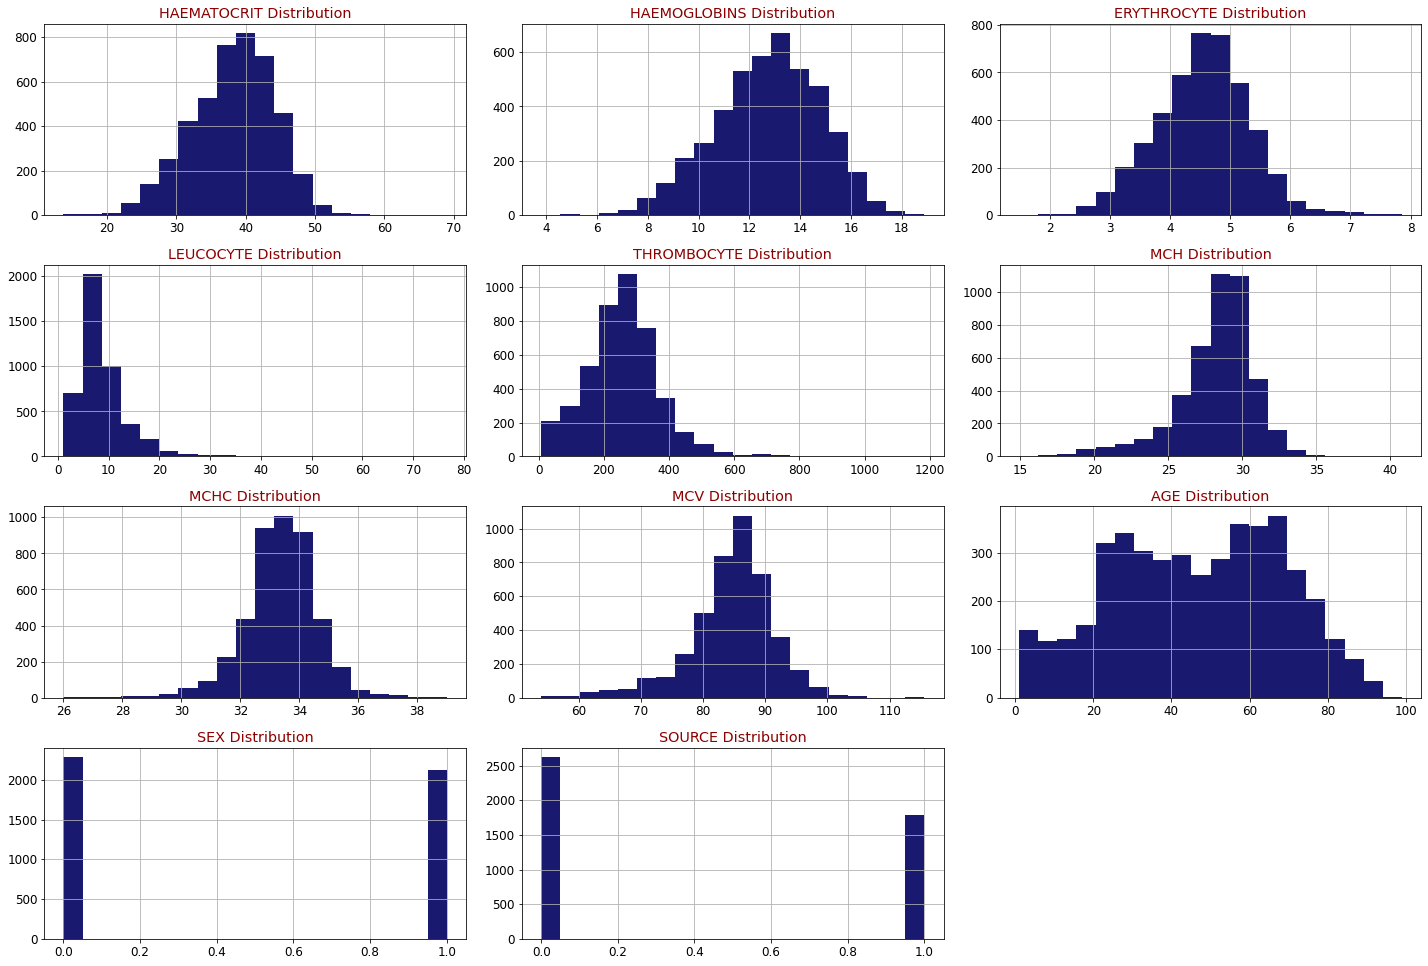

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

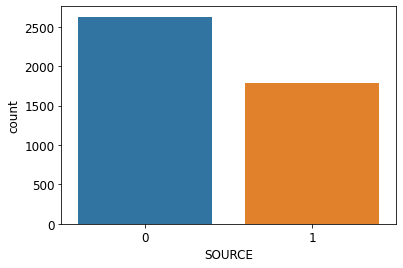

In [ ]:
sns.countplot(x='SOURCE',data=df)

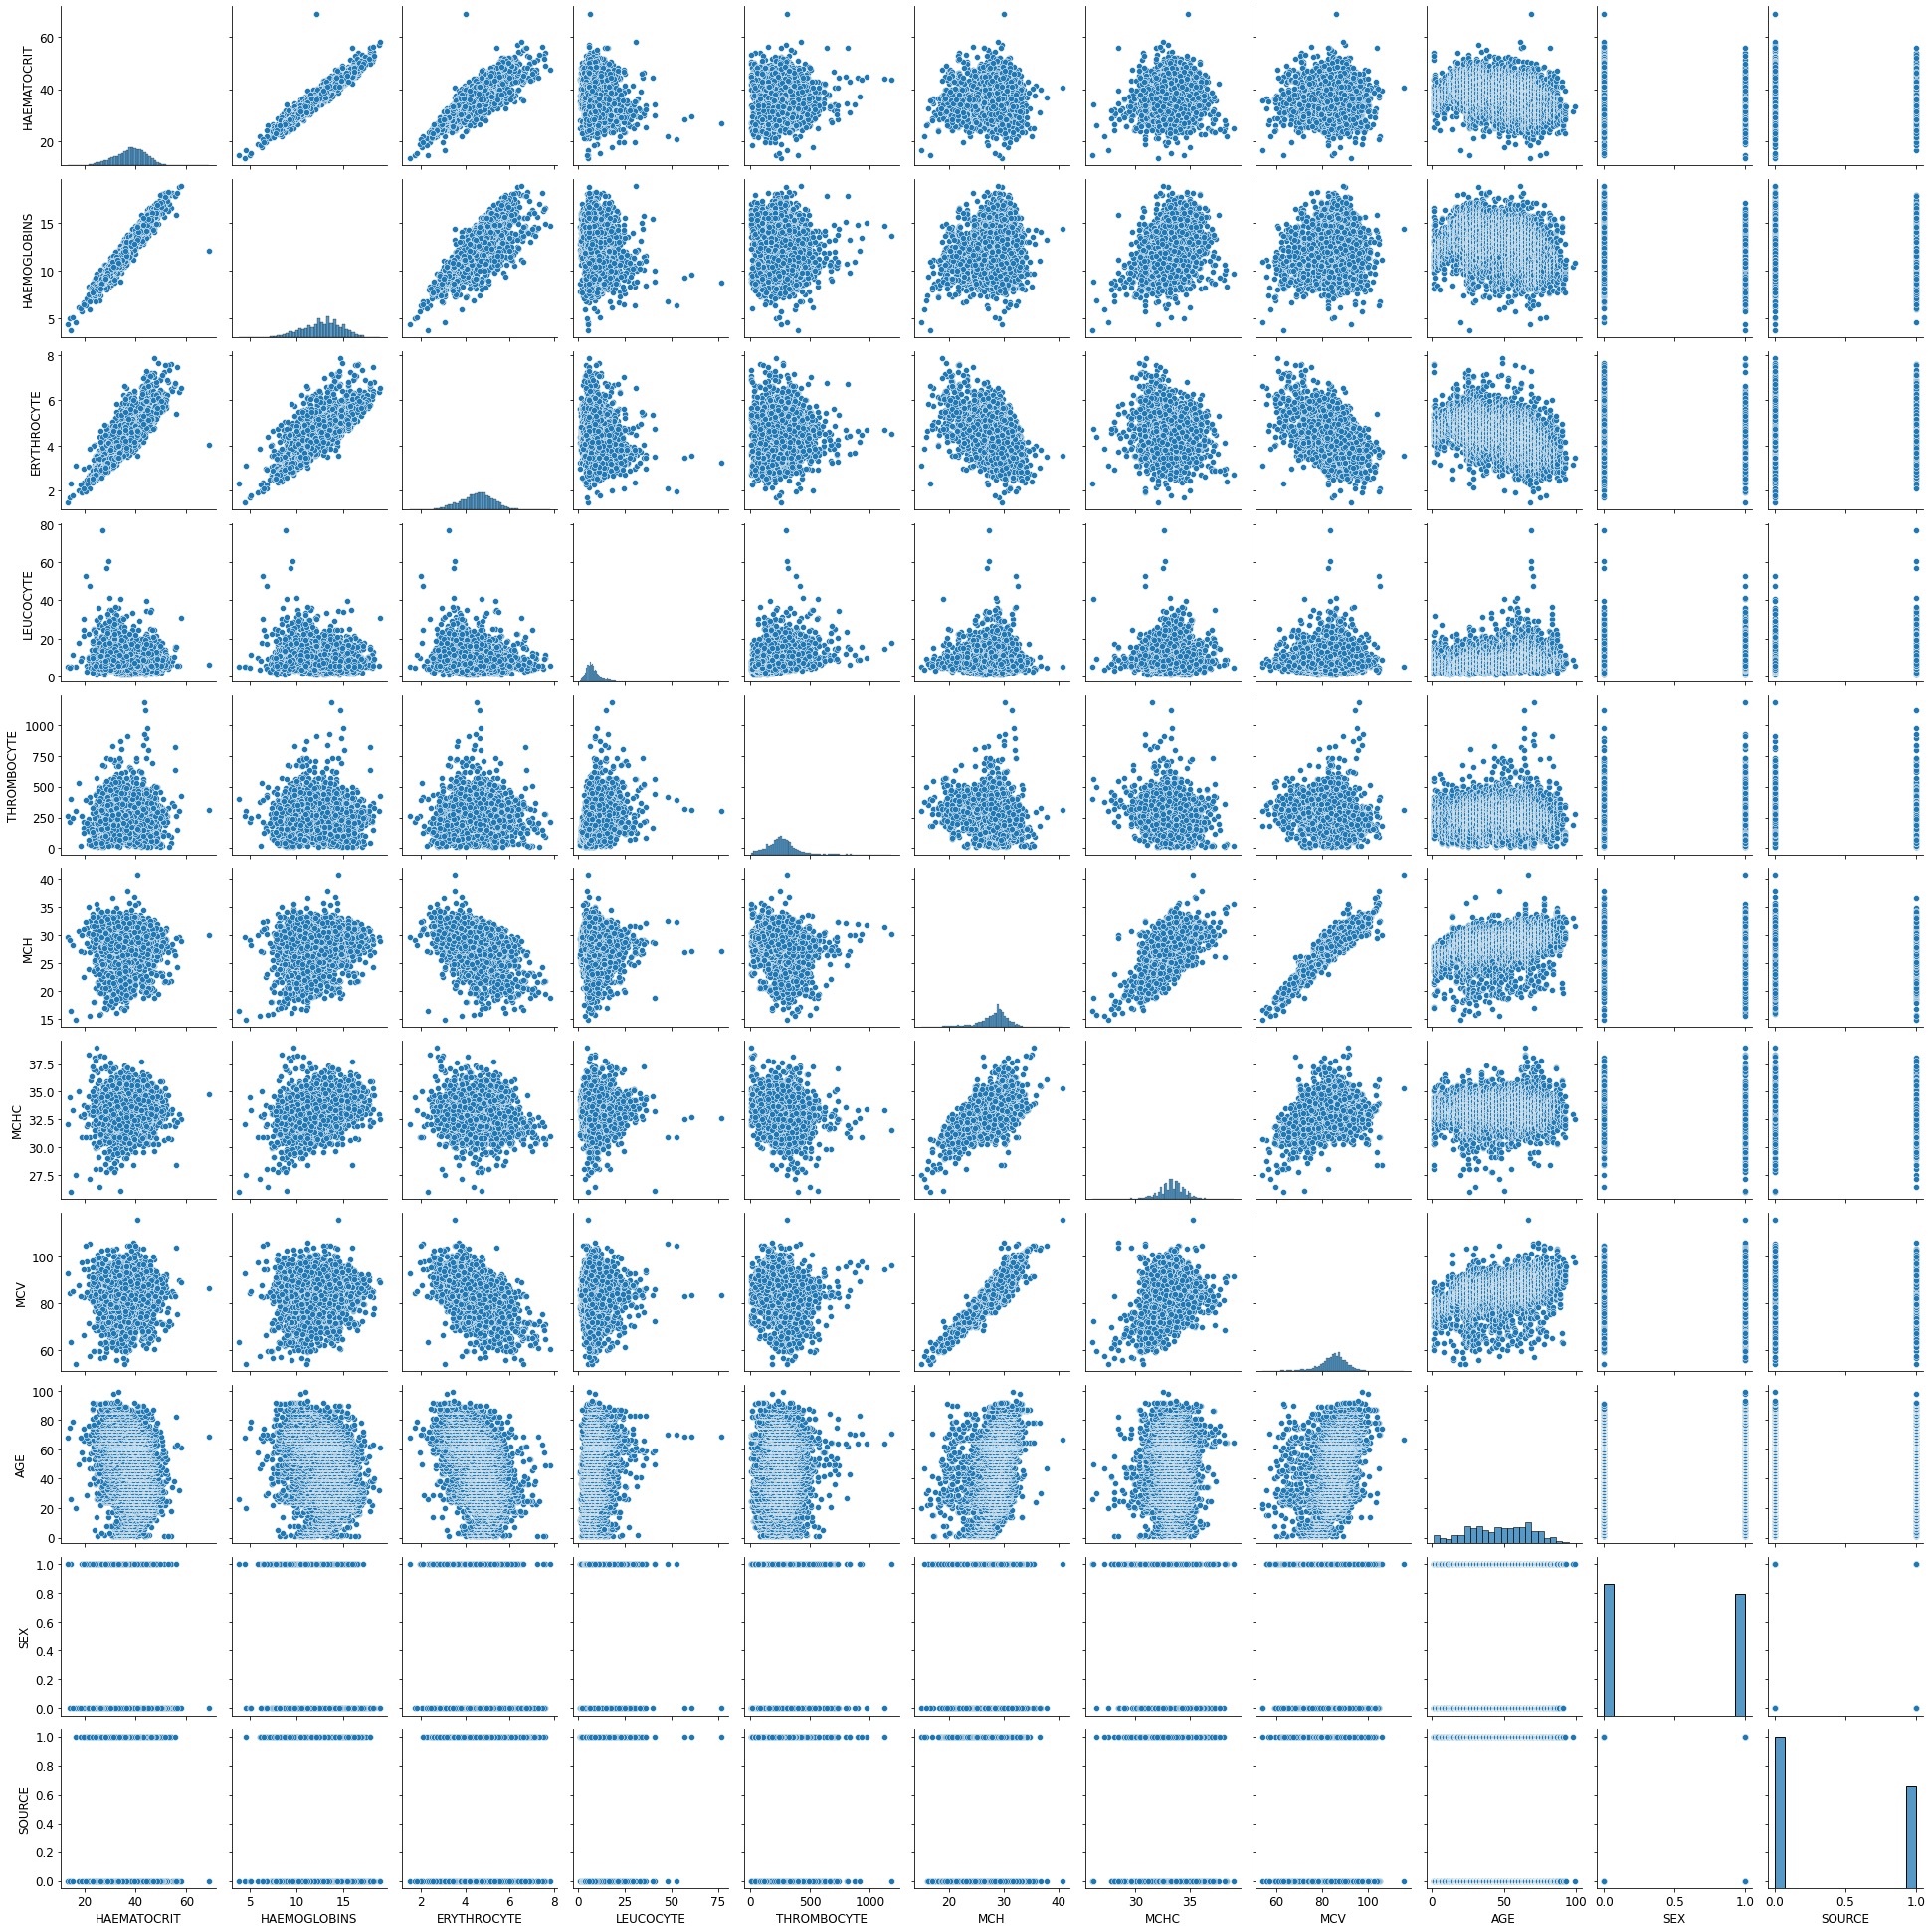

In [ ]:
sns.pairplot(data=df)

# **Naive Bayes**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
gnb = GaussianNB()
#Train the model using the training sets
gnb.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6946175637393768
Precision: 0.6629422718808193
Recall: 0.49859943977591037
F1: 0.5691446842525979


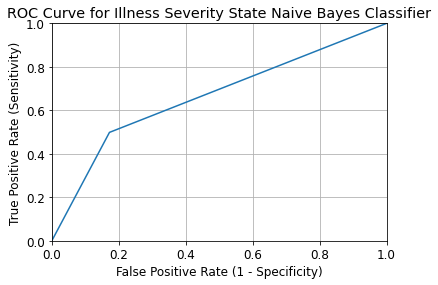

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Illness Severity State Naive Bayes Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

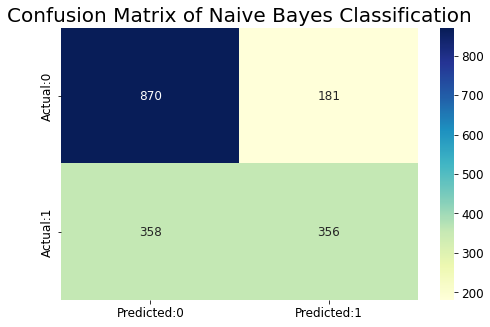

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix of Naive Bayes Classification", fontsize =20)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=300)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
clf.feature_importances_

Accuracy: 0.7597733711048159


array([0.1143464 , 0.08805672, 0.10353542, 0.11947536, 0.21859859,
       0.07699656, 0.08092569, 0.08880163, 0.09496591, 0.01429772])

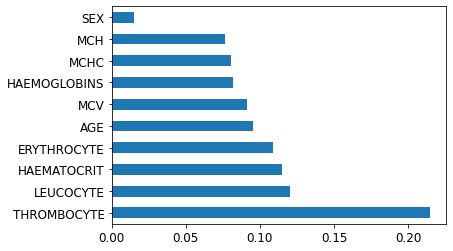

In [ ]:
# plt.barh(index=X.columns, rf.feature_importances_)
(pd.Series(clf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))

In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7524079320113315
Precision: 0.7327731092436974
Recall: 0.6106442577030813
F1: 0.6661573720397249


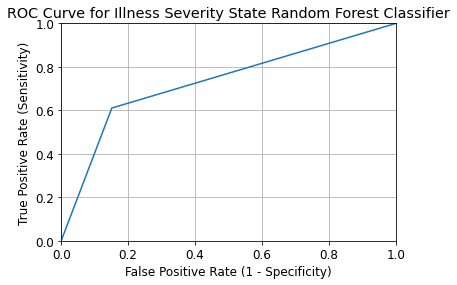

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Illness Severity State Random Forest Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

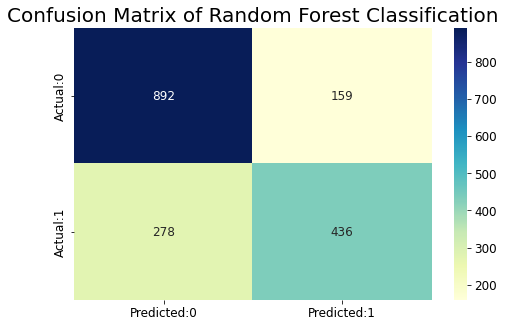

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix of Random Forest Classification", fontsize =20)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# **SVC**

In [ ]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7348441926345609
Precision: 0.7430830039525692
Recall: 0.5266106442577031
F1: 0.6163934426229508


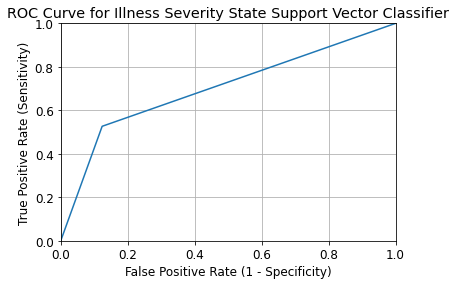

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Illness Severity State Support Vector Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

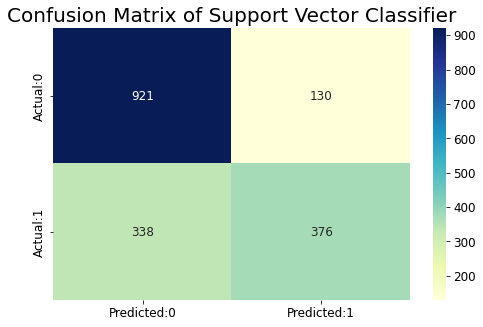

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix of Support Vector Classifier", fontsize =20)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# **XG-Boost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

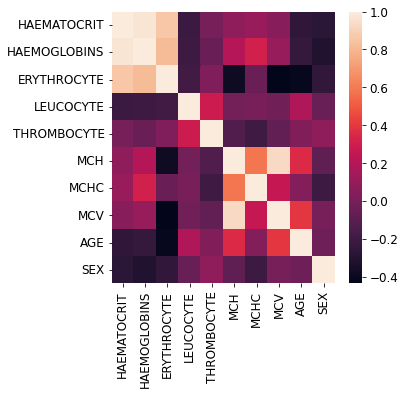

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(X.corr(),annot=False)

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.09%


In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7609065155807365


In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1:",metrics.f1_score(y_test, predictions))

Accuracy: 0.7609065155807365
Precision: 0.7441471571906354
Recall: 0.623249299719888
F1: 0.6783536585365854


In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,0.108316,0.036414,0.014350,0.019441,0.956640,0.078383,0.103687,0.232988,0.003086,0.003086
1,0.124395,0.042323,0.015414,0.036318,0.955127,0.078641,0.097228,0.230775,0.002860,0.002860
2,0.105320,0.035526,0.014902,0.041499,0.958881,0.074824,0.105949,0.222272,0.003144,0.003144
3,0.103054,0.036109,0.013126,0.027674,0.964652,0.072481,0.092248,0.206899,0.002636,0.002636
4,0.089443,0.028657,0.012244,0.063971,0.963904,0.067734,0.092627,0.211306,0.002895,0.000000


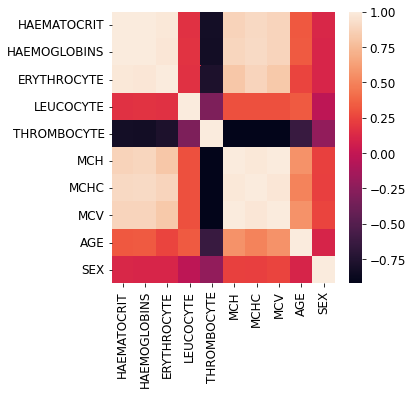

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(data_scaled.corr(),annot=False)

In [ ]:
data_scaled_X1=data_scaled.drop(['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','MCH','MCHC'],axis=1)
data_scaled_X2=data_scaled.drop(['HAEMATOCRIT','HAEMOGLOBINS','ERYTHROCYTE','MCH','MCHC','MCHC'],axis=1)
data_scaled_X3=data_scaled.drop(['HAEMATOCRIT','HAEMOGLOBINS','MCH','MCHC','MCHC'],axis=1)

In [ ]:
X_train_data_scaled, X_test_data_scaled, y_train_data_scaled, y_test_data_scaled = train_test_split(data_scaled, Y, test_size=0.2,stratify=Y,random_state=20)
X_train_data_scaled_X1, X_test_data_scaled_X1, y_train_data_scaled_X1, y_test_data_scaled_X1 = train_test_split(data_scaled_X1, Y, test_size=0.2,stratify=Y,random_state=20)
X_train_data_scaled_X2, X_test_data_scaled_X2, y_train_data_scaled_X2, y_test_data_scaled_X2 = train_test_split(data_scaled_X2, Y, test_size=0.2,stratify=Y,random_state=20)
X_train_data_scaled_X3, X_test_data_scaled_X3, y_train_data_scaled_X3, y_test_data_scaled_X3 = train_test_split(data_scaled_X3, Y, test_size=0.2,stratify=Y,random_state=20)

In [ ]:
model_data_scaled = XGBClassifier()
model_data_scaled.fit(X_train_data_scaled, y_train_data_scaled)

model_data_scaled_X1 = XGBClassifier()
model_data_scaled_X1.fit(X_train_data_scaled_X1, y_train_data_scaled_X1)

model_data_scaled_X2 = XGBClassifier()
model_data_scaled_X2.fit(X_train_data_scaled_X2, y_train_data_scaled_X2)

model_data_scaled_X3 = XGBClassifier()
model_data_scaled_X3.fit(X_train_data_scaled_X3, y_train_data_scaled_X3)

XGBClassifier()

In [ ]:
y_pred_data_scaled = model_data_scaled.predict(X_test_data_scaled)
predictions_data_scaled = [round(value) for value in y_pred_data_scaled]

y_pred_data_scaled_X1 = model_data_scaled_X1.predict(X_test_data_scaled_X1)
predictions_data_scaled_X1 = [round(value) for value in y_pred_data_scaled]

y_pred_data_scaled_X2 = model_data_scaled_X2.predict(X_test_data_scaled_X2)
predictions_data_scaled_X2 = [round(value) for value in y_pred_data_scaled]

y_pred_data_scaled_X3 = model_data_scaled_X3.predict(X_test_data_scaled_X3)
predictions_data_scaled_X3 = [round(value) for value in y_pred_data_scaled]

In [ ]:
import sklearn.metrics as metrics
print("Accuracy_data_scaled:",metrics.accuracy_score(y_test_data_scaled, predictions_data_scaled))
print("Precision_data_scaled:",metrics.precision_score(y_test_data_scaled, predictions_data_scaled))
print("Recall_data_scaled:",metrics.recall_score(y_test_data_scaled, predictions_data_scaled))
print("F1_data_scaled:",metrics.f1_score(y_test_data_scaled, predictions_data_scaled))
print("\n")
import sklearn.metrics as metrics
print("Accuracy_data_scaled_X1:",metrics.accuracy_score(y_test_data_scaled_X1, predictions_data_scaled_X1))
print("Precision_data_scaled_X1:",metrics.precision_score(y_test_data_scaled_X1, predictions_data_scaled_X1))
print("Recall_data_scaled_X1:",metrics.recall_score(y_test_data_scaled_X1, predictions_data_scaled_X1))
print("F1_data_scaled_X1:",metrics.f1_score(y_test_data_scaled_X1, predictions_data_scaled_X1))
print("\n")
import sklearn.metrics as metrics
print("Accuracy_data_scaled_X2:",metrics.accuracy_score(y_test_data_scaled_X2, predictions_data_scaled_X2))
print("Precision_data_scaled_X2:",metrics.precision_score(y_test_data_scaled_X2, predictions_data_scaled_X2))
print("Recall_data_scaled_X2:",metrics.recall_score(y_test_data_scaled_X2, predictions_data_scaled_X2))
print("F1_data_scaled_X2:",metrics.f1_score(y_test_data_scaled_X2, predictions_data_scaled_X2))
print("\n")
import sklearn.metrics as metrics
print("Accuracy_data_scaled_X3:",metrics.accuracy_score(y_test_data_scaled_X3, predictions_data_scaled_X3))
print("Precision_data_scaled_X3:",metrics.precision_score(y_test_data_scaled_X3, predictions_data_scaled_X3))
print("Recall_data_scaled_X3:",metrics.recall_score(y_test_data_scaled_X3, predictions_data_scaled_X3))
print("F1_data_scaled_X3:",metrics.f1_score(y_test_data_scaled_X3, predictions_data_scaled_X3))

Accuracy_data_scaled: 0.7338618346545867
Precision_data_scaled: 0.7132867132867133
Recall_data_scaled: 0.5714285714285714
F1_data_scaled: 0.6345256609642302


Accuracy_data_scaled_X1: 0.7338618346545867
Precision_data_scaled_X1: 0.7132867132867133
Recall_data_scaled_X1: 0.5714285714285714
F1_data_scaled_X1: 0.6345256609642302


Accuracy_data_scaled_X2: 0.7338618346545867
Precision_data_scaled_X2: 0.7132867132867133
Recall_data_scaled_X2: 0.5714285714285714
F1_data_scaled_X2: 0.6345256609642302


Accuracy_data_scaled_X3: 0.7338618346545867
Precision_data_scaled_X3: 0.7132867132867133
Recall_data_scaled_X3: 0.5714285714285714
F1_data_scaled_X3: 0.6345256609642302


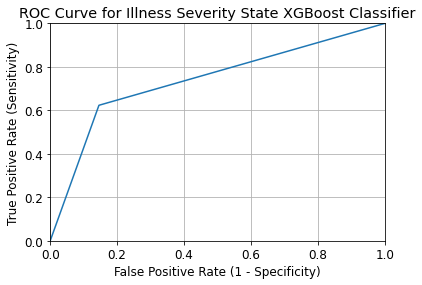

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Illness Severity State XGBoost Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

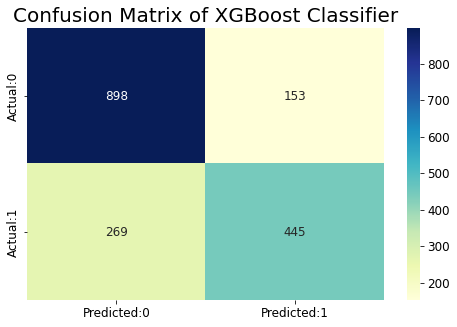

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix of XGBoost Classifier", fontsize =20)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# **Decision Tree**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.6555240793201134
Precision: 0.5674300254452926
Recall: 0.6246498599439776
F1: 0.5946666666666667


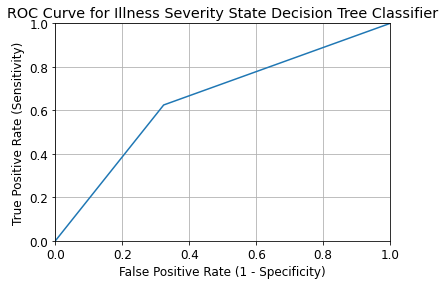

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Illness Severity State Decision Tree Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

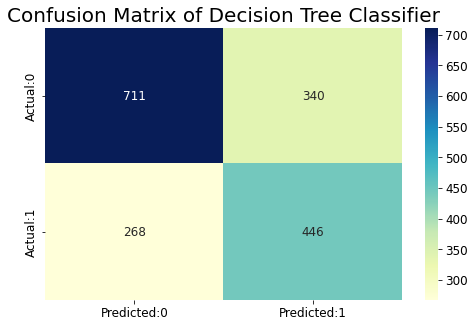

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix of Decision Tree Classifier", fontsize =20)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# **AdaBoost**

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.739943342776204
Precision: 0.7186963979416809
Recall: 0.5868347338935574
F1: 0.6461063993831919


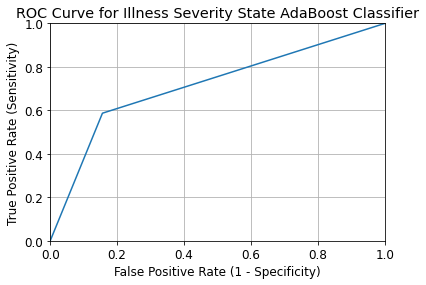

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Illness Severity State AdaBoost Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

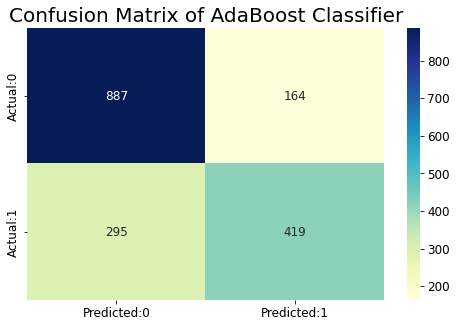

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix of AdaBoost Classifier", fontsize =20)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# **KNN**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.13540035,  0.07592785,  0.69937983, ..., -1.1734649 ,
        -1.52848912, -0.96912029],
       [-0.75800569, -1.0218075 , -0.94958825, ...,  0.60021139,
         1.30129782,  1.03186365],
       [ 0.87990538,  1.1736632 ,  0.68669546, ...,  0.14579845,
        -1.07207187, -0.96912029],
       ...,
       [ 1.27697473,  0.69638696,  3.17283196, ..., -2.84453182,
        -1.07207187, -0.96912029],
       [-0.72491658, -0.73544176, -0.68321648, ..., -0.01544485,
         0.02332953,  1.03186365],
       [ 0.03613301, -0.06725502,  0.09053008, ..., -0.19134663,
         1.80335679,  1.03186365]])

In [ ]:
from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=16,n_jobs=-1)
KNN_model.fit(X_train,y_train)
pred=KNN_model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,100):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    f=f1_score(y_test,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

In [ ]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]        
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 13  with F1-Score= 0.6905839125237947


In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))
print("F1:",metrics.f1_score(y_test, pred))

Accuracy: 0.6980169971671388
Precision: 0.7223587223587223
Recall: 0.4117647058823529
F1: 0.5245316681534344


In [ ]:
F1 = 2 * (metrics.precision_score(y_test, pred) * metrics.recall_score(y_test, pred)) / (metrics.precision_score(y_test, pred) + metrics.recall_score(y_test, pred))

In [ ]:
F1

0.5245316681534344

In [ ]:
from sklearn.metrics import precision_score
precision_list=[]
k_list=[]
for k in range(1,100):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    p=precision_score(y_test,pred,average='macro')
    precision_list.append(p)
    k_list.append(k)

In [ ]:
best_precision_score=max(precision_list)
best_k=k_list[precision_list.index(best_precision_score)]        
print("Optimum K value=",best_k," with Best-Precision-Score=",best_precision_score)

Optimum K value= 32  with Best-Precision-Score= 0.7337514153819353


In [ ]:
from sklearn.metrics import precision_score
precision_list=[]
k_list=[]
for k in range(1,100):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    p=precision_score(y_test,pred,average='micro')
    precision_list.append(p)
    k_list.append(k)

In [ ]:
best_precision_score=max(precision_list)
best_k=k_list[precision_list.index(best_precision_score)]        
print("Optimum K value=",best_k," with Best-Precision-Score=",best_precision_score)

Optimum K value= 32  with Best-Precision-Score= 0.7212464589235128


In [ ]:
from sklearn.metrics import precision_score
precision_list=[]
k_list=[]
for k in range(1,100):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    p=precision_score(y_test,pred,average='weighted')
    precision_list.append(p)
    k_list.append(k)

best_precision_score=max(precision_list)
best_k=k_list[precision_list.index(best_precision_score)]        
print("Optimum K value=",best_k," with Best-Precision-Score=",best_precision_score)

Optimum K value= 32  with Best-Precision-Score= 0.7290948735847106


In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))
print("F1:",metrics.f1_score(y_test, pred))

Accuracy: 0.6980169971671388
Precision: 0.7223587223587223
Recall: 0.4117647058823529
F1: 0.5245316681534344


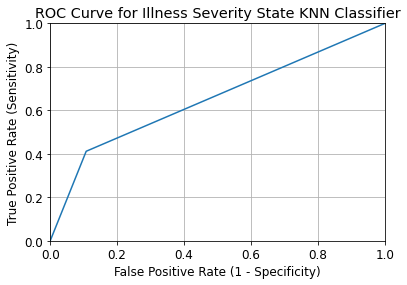

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Illness Severity State KNN Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

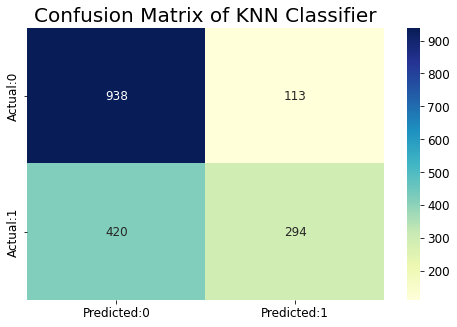

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix of KNN Classifier", fontsize =20)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# **LightGBM**

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   int64  
 10  SOURCE        4412 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 379.3 KB


In [ ]:
# check the distribution of the target variable
df['SOURCE'].value_counts()

0    2628
1    1784
Name: SOURCE, dtype: int64

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
# predict the results
y_pred=clf.predict(X_test)

In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7490084985835694
Precision: 0.7154213036565977
Recall: 0.6302521008403361
F1: 0.6701414743112435


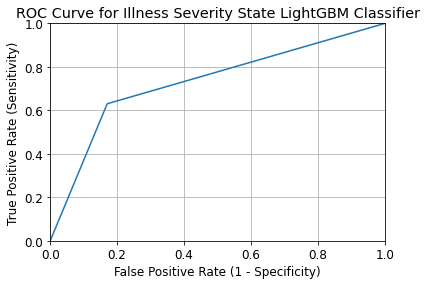

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Illness Severity State LightGBM Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

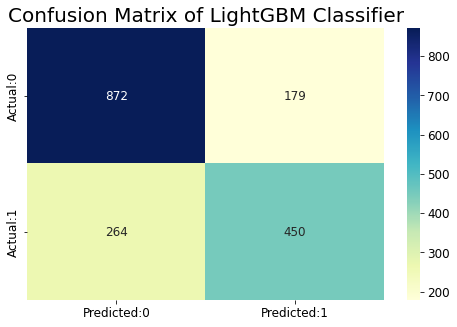

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix of LightGBM Classifier", fontsize =20)
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")